# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Luthfia Hafiz
- **Email:** luthfiahafiz31@gmail.com
- **ID Dicoding:** luthfiahafiz

## Menentukan Pertanyaan Bisnis

- How do temperature, humidity, rainfall, and wind speed affect the number of bicycle borrowings?
- How can bicycle lending patterns influenced by borrowing time and duration be used to optimize the allocation of bicycle borrowing and returning stations?

## Import Semua Packages/Library yang Digunakan

Import the required libraries such as pandas, numpy, matplotlib, and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Read two datasets, days.csv and hours.csv, from the URL and save them in two separate dataframes.

In [2]:
url = 'https://raw.githubusercontent.com/luthfiahafiz/Proyek-Analisis-Data/main/hour.csv'
hour_data = pd.read_csv(url)
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
url1 = 'https://raw.githubusercontent.com/luthfiahafiz/Proyek-Analisis-Data/main/day.csv'
weather_data = pd.read_csv(url1)
weather_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Gathering Data

Merge the two data sets based on the 'dteday' column and store them in a single dataframe called merged_data.

In [4]:
# Merging both data
merged_data = pd.merge(hour_data, weather_data, on='dteday', suffixes=('_hour', '_weather'))
merged_data.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_weather,workingday_weather,weathersit_weather,temp_weather,atemp_weather,hum_weather,windspeed_weather,casual_weather,registered_weather,cnt_weather
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Assessing Data

Explores the data by displaying descriptive statistical information and summaries.

In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant_hour        17379 non-null  int64  
 1   dteday              17379 non-null  object 
 2   season_hour         17379 non-null  int64  
 3   yr_hour             17379 non-null  int64  
 4   mnth_hour           17379 non-null  int64  
 5   hr                  17379 non-null  int64  
 6   holiday_hour        17379 non-null  int64  
 7   weekday_hour        17379 non-null  int64  
 8   workingday_hour     17379 non-null  int64  
 9   weathersit_hour     17379 non-null  int64  
 10  temp_hour           17379 non-null  float64
 11  atemp_hour          17379 non-null  float64
 12  hum_hour            17379 non-null  float64
 13  windspeed_hour      17379 non-null  float64
 14  casual_hour         17379 non-null  int64  
 15  registered_hour     17379 non-null  int64  
 16  cnt_

In [6]:
merged_data.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_weather,workingday_weather,weathersit_weather,temp_weather,atemp_weather,hum_weather,windspeed_weather,casual_weather,registered_weather,cnt_weather
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data


Remove rows that have null and duplicate values.

In [7]:
# Handling missing values
merged_data.dropna(inplace=True)

In [8]:
# Detect and handle duplicate data
duplicates = merged_data.duplicated().sum()
print("Number of duplicates:", duplicates)
merged_data.drop_duplicates(inplace=True)

Number of duplicates: 0


## Exploratory Data Analysis (EDA)

Compute a correlation matrix for the hourly and weather data, and display the correlation matrix as a heatmap.

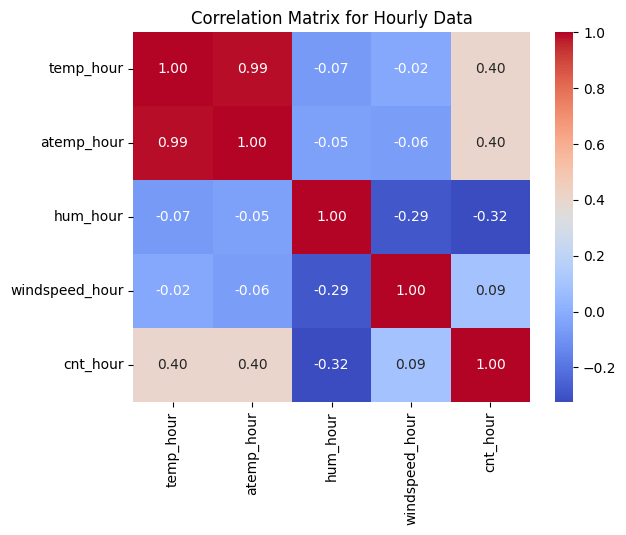

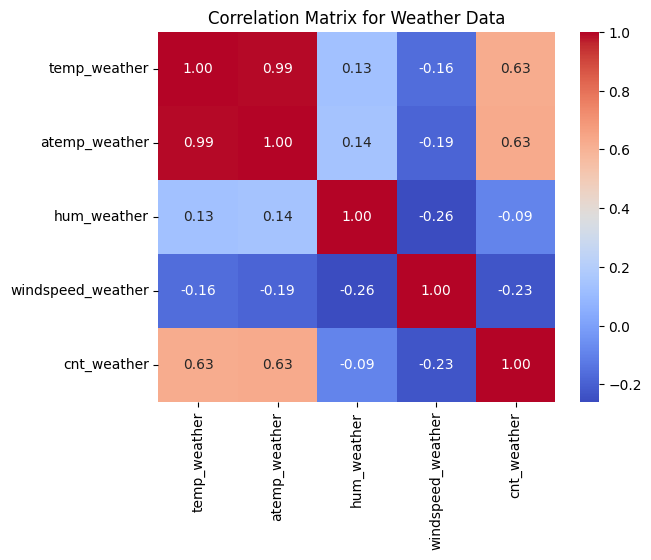

In [9]:
# Correlation between numerical variables
corr_matrix = merged_data[['temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'cnt_hour']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Hourly Data')
plt.show()

corr_matrix_weather = merged_data[['temp_weather', 'atemp_weather', 'hum_weather', 'windspeed_weather', 'cnt_weather']].corr()
sns.heatmap(corr_matrix_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Weather Data')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Display visualizations of various relationships between variables, such as scatter plots to see the relationship between temperature, humidity, wind speed, and the number of bike borrowings per hour. Also, display box plots to see the influence of weather conditions on the number of bike borrowings.

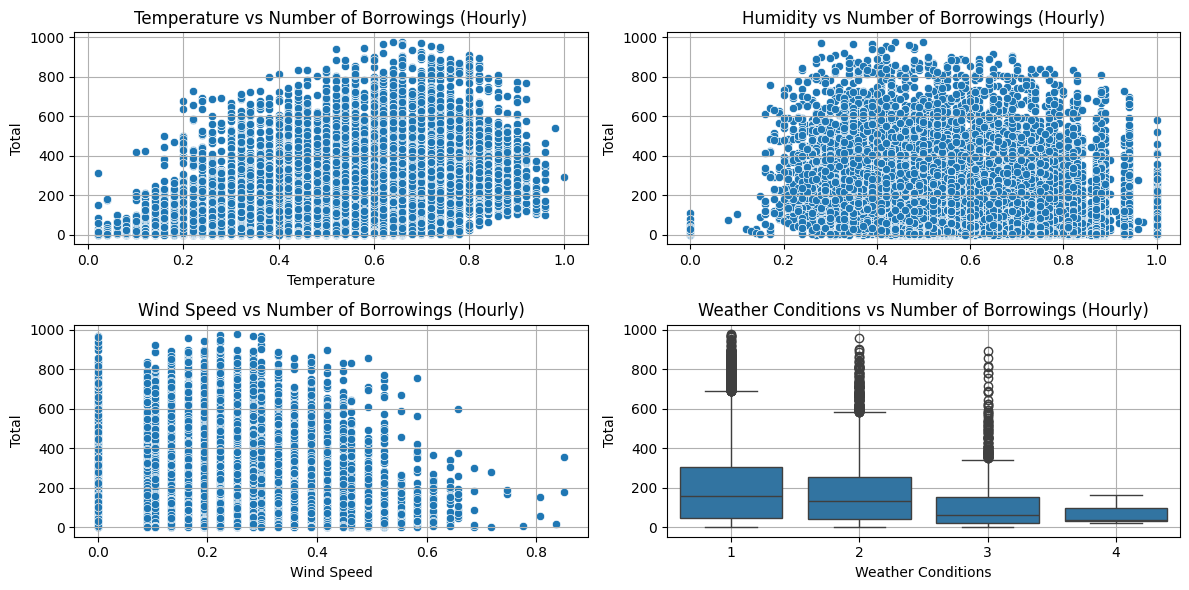

In [10]:
# Relationship between temperature and number of borrowings
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp_hour', y='cnt_hour', data=merged_data)
plt.title('Temperature vs Number of Borrowings (Hourly)')
plt.xlabel('Temperature')
plt.ylabel('Total')
plt.grid()

# Relationship between humidity and number of borrowings
plt.subplot(2, 2, 2)
sns.scatterplot(x='hum_hour', y='cnt_hour', data=merged_data)
plt.title('Humidity vs Number of Borrowings (Hourly)')
plt.xlabel('Humidity')
plt.ylabel('Total')
plt.grid()

# Relationship between wind speed and number of borrowings
plt.subplot(2, 2, 3)
sns.scatterplot(x='windspeed_hour', y='cnt_hour', data=merged_data)
plt.title('Wind Speed vs Number of Borrowings (Hourly)')
plt.xlabel('Wind Speed')
plt.ylabel('Total')
plt.grid()

# Relationship between weather conditions and the number of borrowings
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit_hour', y='cnt_hour', data=merged_data)
plt.title('Weather Conditions vs Number of Borrowings (Hourly)')
plt.xlabel('Weather Conditions')
plt.ylabel('Total')
plt.tight_layout()
plt.grid()
plt.show()

Based on the Temperature vs. Number of Borrowings (Per Hour) graph, it can be seen that
*   The number of borrowings tends to increase as the temperature increases.
*   There is a peak point around a temperature of 0.6, where the number of borrowings reaches a maximum value.
*   The number of borrowings decreases when the temperature drops below 0.6 or increases above 0.8.

Based on the graph of Humidity vs. Number of Borrows (Per Hour), it can be seen that
*   The number of loans increases when the humidity increases to around 0.5.
*   The number of borrowings decreases when the humidity increases above 0.5.

Based on the Wind speed graph, it can be seen that
*   The number of borrowings decreases as the wind speed increases.
*   There is a peak point around wind speed 0.2, where the number of borrowings reaches the maximum value.

Based on the weather condition graph, it can be seen that
*   The number of borrowings is highest when the weather is sunny.
*   The number of borrowings is lowest when the weather is heavy rain.
*   The number of borrowings is between the two extreme values when the weather is cloudy or light rainy.






### Pertanyaan 2:

Display a line graph to see the hourly pattern of bike borrowing, with the difference between weekdays and holidays.

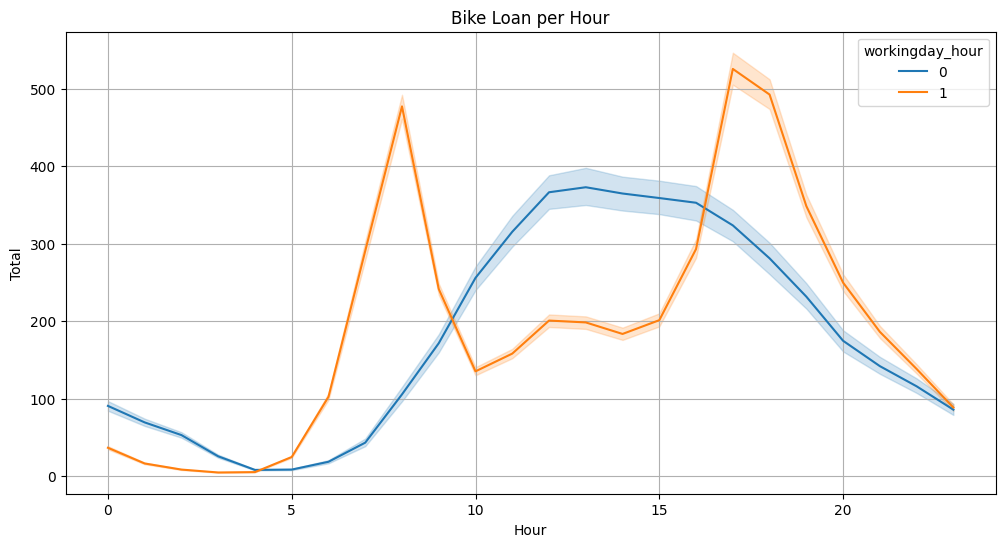

In [11]:
# Visualization of hourly bike borrowings
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='hr', y='cnt_hour', hue='workingday_hour')
plt.title('Bike Loan per Hour')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.grid()
plt.show()


The Bicycle Borrowing by Hour graph shows that
* Borrowing on holidays occurs more in the early morning and afternoon.
* Borrowing on weekdays occurs more in the morning and afternoon.



Display the distribution of the number of bicycle borrowings in the form of a histogram to see the overall distribution of the data.

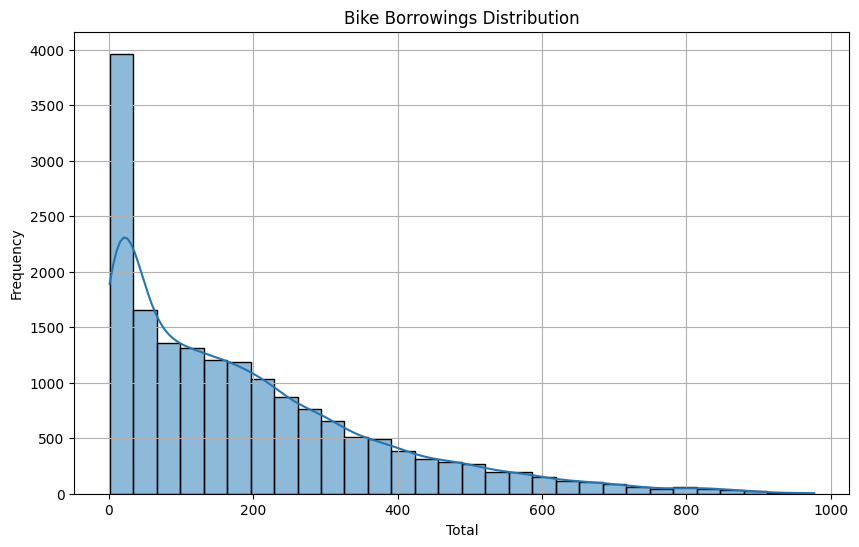

In [12]:
# Bike borrowings distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='cnt_hour', bins=30, kde=True)
plt.title('Bike Borrowings Distribution')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The Bicycle Borrowing Distribution graph shows that
* The majority of borrowings are of short duration, i.e. less than 2 hours.
* The number of borrowings decreases as the duration of the loan increases.
* There are few borrowings with a duration of more than 6 hours.

## Conclusion

- Conclution pertanyaan 1

Based on data analysis and visualization, it was found that temperature, humidity, wind speed, and weather conditions affect the number of bike borrowings. In general, the number of borrowings tends to increase as the temperature and humidity rise, but starts to decrease when it reaches a certain point. Similarly, the number of borrowings tends to decrease as the wind speed increases. Weather conditions also play an important role, with the highest number of borrowings occurring during sunny weather and the lowest during heavy rain. These findings indicate that bicycle lending managers can optimize their stocking and marketing strategies by taking these factors into consideration, thereby improving customer service and overall business profits.


- Conclution pertanyaan 2

Based on the results of the analysis of bicycle borrowing patterns based on time and duration, it can be concluded that borrowing patterns vary depending on whether the day is a holiday or a weekday. Borrowing on holidays tends to occur more in the morning and evening, while on weekdays, borrowing occurs more in the morning and evening. In addition, most borrowings are of short duration, less than 2 hours, with the number of borrowings decreasing as the borrowing duration increases. These findings suggest that to optimize the allocation of bicycle lending and returning stations, consideration could be given to adjusting the number of bicycles available at certain stations to the existing lending patterns. For example, stations in areas that are busier in the morning and evening could be assigned more bicycles, while stations in areas with lower borrowing demand could be assigned fewer bicycles. This can help increase the availability of bicycles at stations where they are most needed, as well as optimize the overall use of resources.

In [13]:
merged_data.to_csv("merged_data.csv", index=False)

In [14]:
!pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 609.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [15]:
!pip install streamlit